<a href="https://colab.research.google.com/github/Meerasrilekha/Diginique-Techlabs-and-iHUB-DivyaSampark-IIT-ROORKEE-Internship/blob/main/Bigmart_sales_predictive_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train = pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn


In [ ]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [ ]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [ ]:
!pip install klib


GridSpec(6, 5)

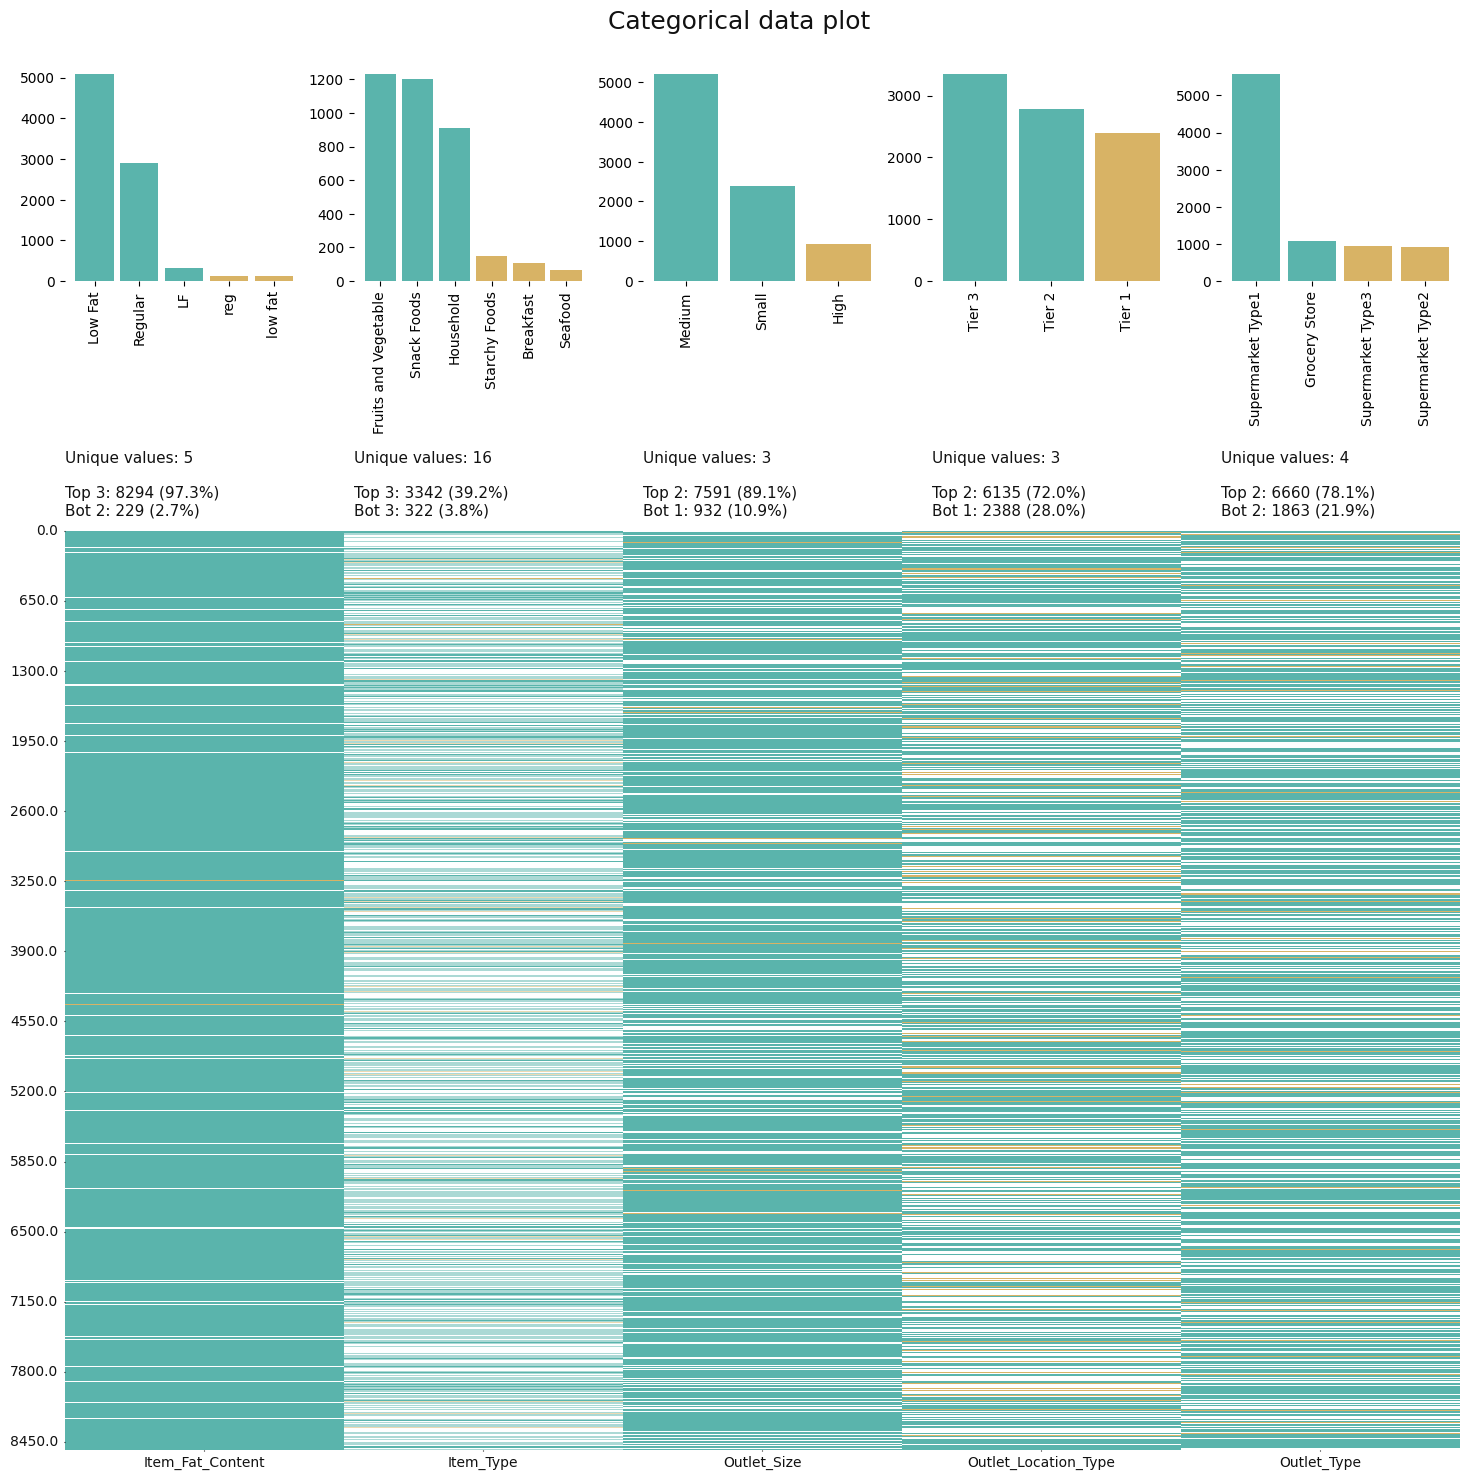

In [ ]:
import klib
klib.cat_plot(df_train)

In [ ]:
!pip install dtale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 39.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 43.6 MB/s eta 0:00:00
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62564 sha256=773e65d89e

In [ ]:
import dtale
dtale.show(df_train)

http://6eebe9c34698:40000/dtale/main/1

In [ ]:
pip list | grep dtale

dtale                            3.3.0


In [ ]:
pip install dtale

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 26.7 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv
report = sv.analyze(df_train)
report.show_html()

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future ver

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 69.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=d34b26c412910683910086577408a1c4ee610af840a7465a1226a0f86a83759f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_train,title="pandas profiling report")
print(profile)

2023-08-02 09:31:38,188 - INFO     - Pandas backend loaded 1.5.3
2023-08-02 09:31:38,199 - INFO     - Numpy backend loaded 1.22.4
2023-08-02 09:31:38,201 - INFO     - Pyspark backend NOT loaded
2023-08-02 09:31:38,203 - INFO     - Python backend loaded


<ipython-input-24-f1e48bc51423>:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-26-9eedae251a34>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



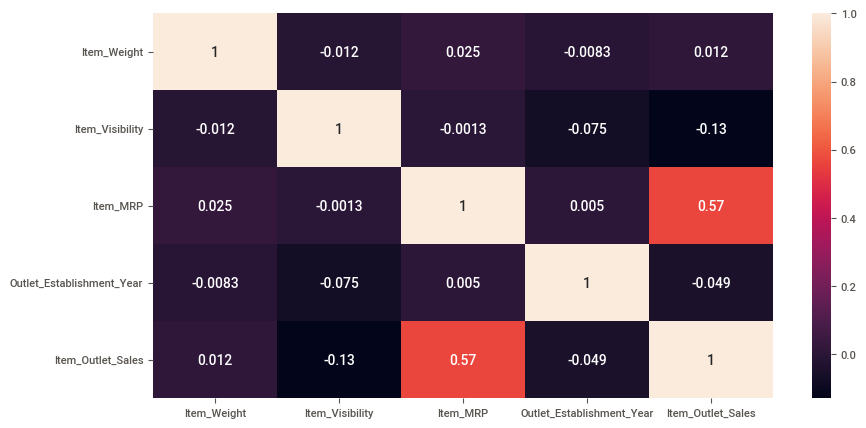

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(),annot = True)
plt.show()

<Axes: xlabel='Item_Weight', ylabel='Density'>

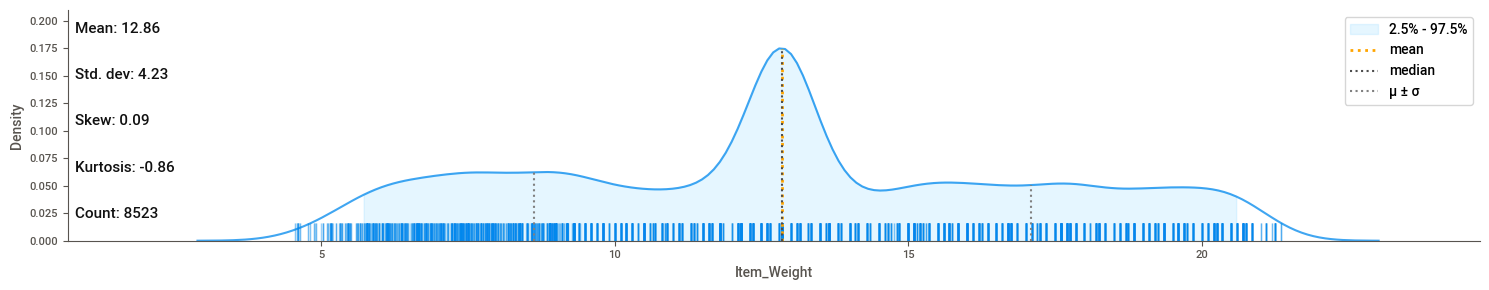

In [ ]:
klib.dist_plot(df_train)

<Axes: title={'center': 'Feature-correlation (pearson)'}>

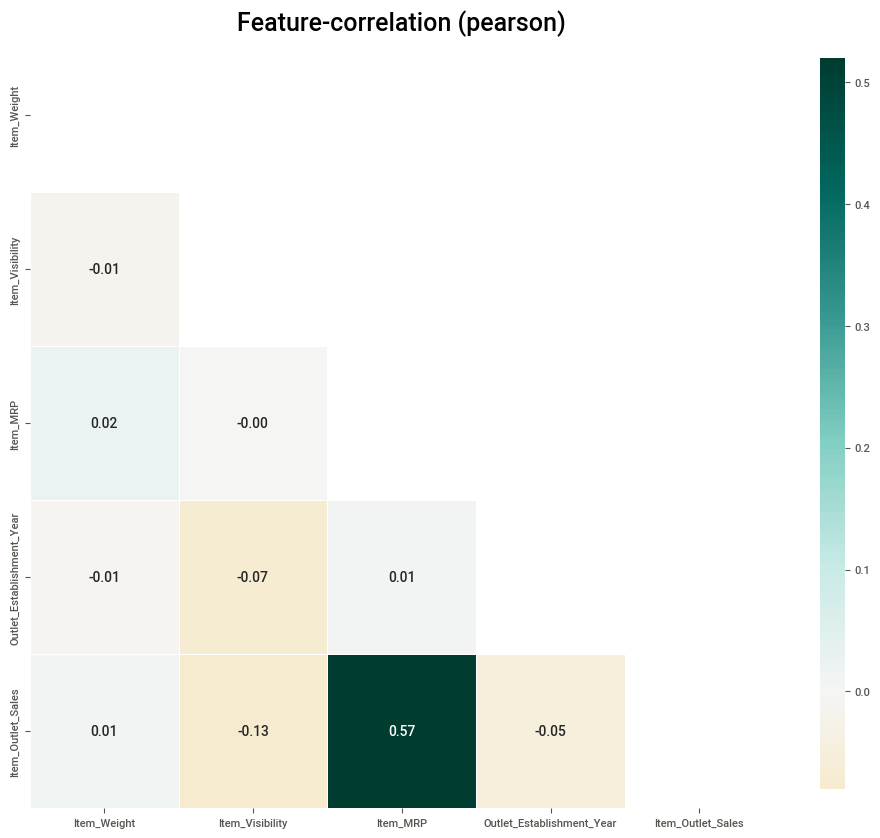

In [ ]:
klib.corr_mat(df_train)
klib.corr_plot(df_train)

In [ ]:
#data cleansing using klib
klib.data_cleaning(df_train)

Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.46 MB (-70.77%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [ ]:
klib.clean_column_names(df_train)

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
klib.convert_datatypes(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                8523 non-null   float64
 1   item_fat_content           8523 non-null   object 
 2   item_visibility            8523 non-null   float64
 3   item_type                  8523 non-null   object 
 4   item_mrp                   8523 non-null   float64
 5   outlet_establishment_year  8523 non-null   int64  
 6   outlet_size                8523 non-null   object 
 7   outlet_location_type       8523 non-null   object 
 8   outlet_type                8523 non-null   object 
 9   item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [ ]:
klib.mv_col_handling(df_train)

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
klib.pool_duplicate_subsets(df_train)

,item_visibility,item_mrp,item_outlet_sales,pooled_vars
0,0.016047,249.8092,3735.1380,0
1,0.019278,48.2692,443.4228,1
2,0.016760,141.6180,2097.2700,2
3,0.000000,182.0950,732.3800,3
4,0.000000,53.8614,994.7052,4
...,...,...,...,...
8518,0.056783,214.5218,2778.3834,8518
8519,0.046982,108.1570,549.2850,8519
8520,0.035186,85.1224,1193.1136,8520
8521,0.145221,103.1332,1845.5976,8521


In [ ]:
#preprocessing task before model building label encoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train.head()
df_train['item_fat_content']= le.fit_transform(df_train['item_type'])
df_train['item_type']= le.fit_transform(df_train['item_fat_content'])
df_train['outlet_size']= le.fit_transform(df_train['outlet_size'])
df_train['outlet_location_type']= le.fit_transform(df_train['outlet_location_type'])
df_train['outlet_type']= le.fit_transform(df_train['outlet_type'])
df_train.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.30,4,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,14,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,10,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,6,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,9,0.000000,9,53.8614,1987,0,2,1,994.7052


In [ ]:
!pip install train_test_split

ERROR: Could not find a version that satisfies the requirement train_test_split (from versions: none)
ERROR: No matching distribution found for train_test_split


In [ ]:
#spliting data into train and test
X= df_train.drop('item_outlet_sales',axis=1)
Y=df_train['item_outlet_sales']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=101,test_size=0.2)


In [ ]:
X_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
3684,19.250,4,0.101689,4,54.6956,1987,0,2,1
1935,7.630,14,0.061410,14,94.6436,2007,1,1,1
5142,19.350,10,0.065891,10,167.0816,2007,1,1,1
4978,6.380,4,0.031898,4,177.4344,1997,2,0,1
2299,16.700,4,0.022110,4,110.8886,2002,1,1,1
...,...,...,...,...,...,...,...,...,...
599,5.000,14,0.044005,14,188.8530,1997,2,0,1
5695,14.650,7,0.170664,7,56.4614,2002,1,1,1
8006,12.500,8,0.018849,8,96.7384,1997,2,0,1
1361,9.695,0,0.129009,0,226.9404,2007,1,1,1


In [ ]:
X_test

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
8179,11.00,8,0.055163,8,100.3358,2009,1,2,2
8355,18.00,13,0.038979,13,148.6418,1987,0,2,1
3411,7.72,1,0.074731,1,77.5986,1997,2,0,1
7089,20.70,6,0.049035,6,39.9506,2007,1,1,1
6954,7.55,3,0.027225,3,152.9340,2002,1,1,1
...,...,...,...,...,...,...,...,...,...
1317,16.75,13,0.105019,13,155.2630,1999,1,0,1
4996,8.52,14,0.027059,14,153.3682,1997,2,0,1
531,15.60,11,0.111686,11,184.7924,1998,1,2,0
3891,17.10,9,0.000000,9,114.6860,2009,1,2,2


In [ ]:
#standaraization
X.describe()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,7.226681,0.066132,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220
std,4.226124,4.209990,0.051598,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,4.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,6.000000,0.053931,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,10.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,15.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000


In [ ]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1


In [ ]:
df_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,4,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,14,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,10,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,6,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,9,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,13,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,0,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,8,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,13,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [ ]:
!pip install StandardScaler

  Preparing metadata (setup.py) ... done
  Created wheel for StandardScaler: filename=StandardScaler-0.5-py3-none-any.whl size=2596 sha256=188524ace8263d36ae7084834ffb03a7659872bd990f92ca8dbf2892ea0a216d
  Stored in directory: /root/.cache/pip/wheels/6f/3d/07/ed324a52d8ce97682f9a6d184539debbd32c9bf66c5498a12b
Successfully built StandardScaler


In [ ]:
df_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,4,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,14,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,10,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,6,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,9,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,13,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,0,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,8,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,13,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [ ]:
X_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
3684,19.250,4,0.101689,4,54.6956,1987,0,2,1
1935,7.630,14,0.061410,14,94.6436,2007,1,1,1
5142,19.350,10,0.065891,10,167.0816,2007,1,1,1
4978,6.380,4,0.031898,4,177.4344,1997,2,0,1
2299,16.700,4,0.022110,4,110.8886,2002,1,1,1
...,...,...,...,...,...,...,...,...,...
599,5.000,14,0.044005,14,188.8530,1997,2,0,1
5695,14.650,7,0.170664,7,56.4614,2002,1,1,1
8006,12.500,8,0.018849,8,96.7384,1997,2,0,1
1361,9.695,0,0.129009,0,226.9404,2007,1,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)


In [ ]:
X_train_std

array([[ 1.52290029, -0.75847359,  0.68469729, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.23985603,  1.60759199, -0.09514748, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667616,  0.66116576, -0.00838589, ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197107,  0.18795264, -0.9191623 , ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888428, -1.70489982,  1.21363058, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885683,  0.4245592 ,  1.83915356, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [ ]:
X_test_std


array([[-0.43860915,  0.18795264, -0.21609255, ..., -0.28872895,
         1.08786619,  0.98524841],
       [ 1.22570189,  1.37098543, -0.52943461, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.21845775, -1.46829326,  0.16277342, ...,  1.37953713,
        -1.36527477, -0.25964107],
       ...,
       [ 0.65508096,  0.89777232,  0.87824237, ..., -0.28872895,
         1.08786619, -1.50453056],
       [ 1.01171904,  0.4245592 , -1.28409256, ..., -0.28872895,
         1.08786619,  0.98524841],
       [-1.56558548,  0.66116576, -1.09265374, ..., -0.28872895,
        -0.13870429, -0.25964107]])

In [ ]:
!pip install joblib

In [ ]:
X_train_std

array([[ 1.52290029, -0.75847359,  0.68469729, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.23985603,  1.60759199, -0.09514748, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667616,  0.66116576, -0.00838589, ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197107,  0.18795264, -0.9191623 , ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888428, -1.70489982,  1.21363058, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885683,  0.4245592 ,  1.83915356, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [ ]:
!pip install LinearRegression

In [ ]:
#model building
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [ ]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [ ]:
lr.predict(X_test_std)

array([2058.70486727, 2138.97070243, 1191.34604755, ..., 1286.92741319,
       2374.1049276 , 2331.06383235])

In [ ]:
X_test.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
8179,11.00,8,0.055163,8,100.3358,2009,1,2,2
8355,18.00,13,0.038979,13,148.6418,1987,0,2,1
3411,7.72,1,0.074731,1,77.5986,1997,2,0,1
7089,20.70,6,0.049035,6,39.9506,2007,1,1,1
6954,7.55,3,0.027225,3,152.9340,2002,1,1,1


In [ ]:
Y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: item_outlet_sales, Length: 1705, dtype: float64

In [ ]:
import joblib
joblib.dump(scaler,r'D:\bigmart prediction\models\scaler.sav')

['D:\\bigmart prediction\\models\\scaler.sav']

In [ ]:
Y_pred_lr=lr.predict(X_test_std)

In [ ]:
df_train


,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,4,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,14,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,10,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,6,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,9,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,13,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,0,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,8,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,13,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [ ]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1


In [ ]:
!pip install r2_score
!pip install mean_absolute_error
!pip install mean_squared_error

ERROR: Could not find a version that satisfies the requirement r2_score (from versions: none)
ERROR: No matching distribution found for r2_score
ERROR: Could not find a version that satisfies the requirement mean_absolute_error (from versions: none)
ERROR: No matching distribution found for mean_absolute_error
ERROR: Could not find a version that satisfies the requirement mean_squared_error (from versions: none)
ERROR: No matching distribution found for mean_squared_error


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5041764302388027
881.2504504248969
1162.4543320652012


In [ ]:
import joblib
joblib.dump(lr,r'D:\bigmart prediction\models\lr.sav')

['D:\\bigmart prediction\\models\\lr.sav']

In [ ]:
!pip install sklearn
!pip install RepeatedstratifiedKFold


  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2950 sha256=f433eb7590d5c4d9f7d36ba0432eb7500ffaf066af00ce8f90b6ca8b11dd1006
  Stored in directory: /root/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built sklearn
ERROR: Could not find a version that satisfies the requirement RepeatedstratifiedKFold (from versions: none)
ERROR: No matching distribution found for RepeatedstratifiedKFold


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

In [ ]:
rf.fit(X_train,Y_train)


RandomForestRegressor()

In [ ]:
Y_pred_rf=rf.predict(X_test)

In [ ]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.5452788847047727
788.1064290838709
1113.2299376232459


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.547 using {'n_estimators': 1000}
0.510 (0.010) with: {'n_estimators': 10}
0.540 (0.005) with: {'n_estimators': 100}
0.547 (0.005) with: {'n_estimators': 1000}


In [ ]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [ ]:
grid_search_forest.best_score_

0.5467773802416382

In [ ]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [ ]:
r2_score(Y_test,Y_pred_rf_grid)

0.5496633607811026

In [ ]:
import joblib
joblib.dump(grid_search_forest,r'D:\bigmart prediction\models\grid_search_forest.sav')

['D:\\bigmart prediction\\models\\grid_search_forest.sav']